In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet

In [2]:
df = pickle.load( open( "final_small_data.pkl", "rb" ) )

In [3]:
df.shape

(623, 11)

## trying TBATS with too much data -> dont run cells below

In [ ]:
y_to_train = df.DEMAND.iloc[:(len(df)-1000)]
y_to_test = df.DEMAND.iloc[(len(df)-1000):] # last year for testing

In [ ]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=[24, 24*7])
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=1000)

In [ ]:
y_true = df.DEMAND[-1000:]

In [ ]:
y_true.reset_index(inplace=True, drop=True)

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true,linewidth=3, label='Hourly Demand')
plt.plot(y_forecast, linewidth=3, label='Forecast')
plt.xlabel('Date-Time', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

In [ ]:
mse = mean_squared_error(y_true, y_forecast)
rmse = np.sqrt(mse)
rmse

## try tbats using less data: 4 weeks

In [4]:
df.shape

(623, 11)

In [5]:
y_to_train = df.DEMAND.iloc[:int(.8*len(df))]
y_to_test = df.DEMAND.iloc[-int(.2*len(df)):] # last 20% of data for testing

In [6]:
y_to_train, y_to_test

(0      1305.0
 1      1312.0
 2      1360.0
 3      1341.0
 4      1314.0
         ...  
 493    1001.0
 494    1086.0
 495    1206.0
 496    1311.0
 497    1375.0
 Name: DEMAND, Length: 498, dtype: float64,
 499    1376.0
 500    1392.0
 501    1404.0
 502    1362.0
 503    1291.0
         ...  
 618    1259.0
 619    1259.0
 620    1257.0
 621    1225.0
 622    1196.0
 Name: DEMAND, Length: 124, dtype: float64)

In [7]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=[24, 24*7])
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=124)

In [8]:
len(y_forecast)

124

In [9]:
y_to_test

499    1376.0
500    1392.0
501    1404.0
502    1362.0
503    1291.0
        ...  
618    1259.0
619    1259.0
620    1257.0
621    1225.0
622    1196.0
Name: DEMAND, Length: 124, dtype: float64

In [10]:
y_to_test.reset_index(inplace=True, drop=True)

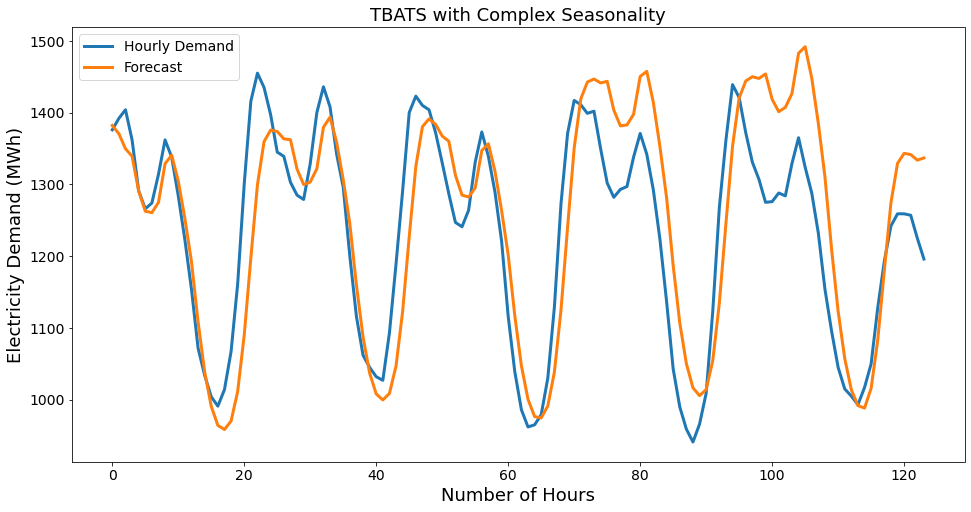

In [11]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_to_test,linewidth=3, label='Hourly Demand')
plt.plot(y_forecast, linewidth=3, label='Forecast')
plt.xlabel('Number of Hours', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.title('TBATS with Complex Seasonality', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [12]:
mse = mean_squared_error(y_to_test, y_forecast)
rmse = np.sqrt(mse)
rmse

86.69857980705874

## try sarimax with exogenous variables

In [13]:
temps = df.Temperature.iloc[:int(.8*len(df))]

In [14]:
y_to_train.reset_index(inplace=True, drop=True)

In [15]:
model = SARIMAX(endog=y_to_train, exog=temps, order=(2,1,1), seasonal_order=(1,1,1,24)).fit(dis=-1)

In [16]:
forecast = model.get_forecast(exog=df.Temperature.iloc[-int(.2*len(df)):], steps=124)

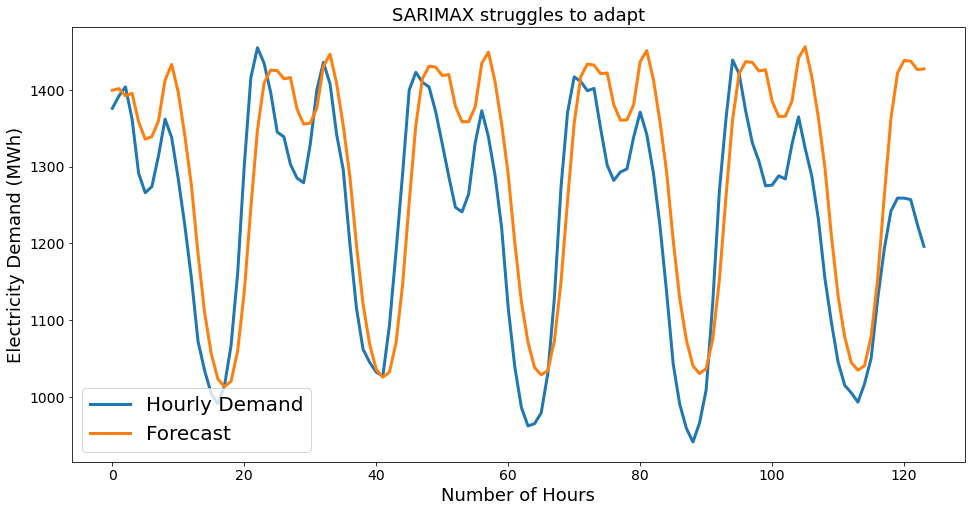

In [17]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_to_test.values,linewidth=3, label='Hourly Demand')
plt.plot(forecast.predicted_mean.values, linewidth=3, label='Forecast')
plt.xlabel('Number of Hours', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.title('SARIMAX struggles to adapt', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

In [18]:
mse = mean_squared_error(y_to_test, forecast.predicted_mean)
rmse = np.sqrt(mse)
rmse

97.22291336489779

## try prophet with small df

In [19]:
train_df = df.iloc[:int(.803*len(df))]

In [20]:
train_df

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
0,2021-02-02 00:26:00,2021-02-02,45.0,0.0,86.0,BKN,29.73,10.0,South,10.0,1305.0
1,2021-02-02 01:53:00,2021-02-02,43.0,0.0,82.0,FEW,29.77,10.0,South,9.0,1312.0
2,2021-02-02 02:53:00,2021-02-02,43.0,0.0,82.0,OVC,29.79,10.0,South,9.0,1360.0
3,2021-02-02 03:53:00,2021-02-02,43.0,0.0,82.0,OVC,29.80,10.0,South,7.0,1341.0
4,2021-02-02 04:51:00,2021-02-02,43.0,0.0,87.0,BKN,29.80,10.0,East,5.0,1314.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-02-22 15:51:00,2021-02-22,52.0,0.0,77.0,SCT,30.06,10.0,South,9.0,1206.0
496,2021-02-22 16:53:00,2021-02-22,51.0,0.0,66.0,SCT,30.06,10.0,South,9.0,1311.0
497,2021-02-22 17:53:00,2021-02-22,48.0,0.0,66.0,FEW,30.09,10.0,South,6.0,1375.0
498,2021-02-22 18:53:00,2021-02-22,46.0,0.0,71.0,OVC,30.13,10.0,West,8.0,1366.0


In [21]:
test_data = df.DEMAND.iloc[-int(.20*len(df)):]

In [22]:
test_data_dates = df.DATE.iloc[-int(.20*len(df)):]

In [23]:
prophet_df = train_df.copy()

In [24]:
prophet_df = prophet_df[['DATE', 'DEMAND']].rename(columns={'DATE':'ds', 'DEMAND':'y'})

In [25]:
prophet_df

,ds,y
0,2021-02-02 00:26:00,1305.0
1,2021-02-02 01:53:00,1312.0
2,2021-02-02 02:53:00,1360.0
3,2021-02-02 03:53:00,1341.0
4,2021-02-02 04:51:00,1314.0
...,...,...
495,2021-02-22 15:51:00,1206.0
496,2021-02-22 16:53:00,1311.0
497,2021-02-22 17:53:00,1375.0
498,2021-02-22 18:53:00,1366.0


In [26]:
model = Prophet()

In [27]:
model.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
future = pd.DataFrame(test_data_dates)

In [29]:
future.rename(columns={'DATE':'ds'}, inplace=True)

In [30]:
forecast = model.predict(future)

In [31]:
y_true = test_data.values
y_pred = forecast['yhat'].values

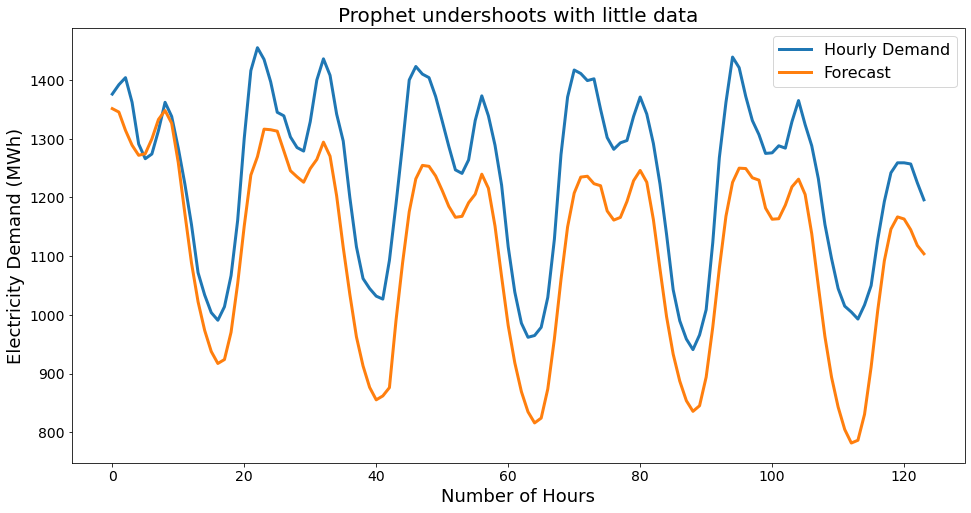

In [34]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true,linewidth=3, label='Hourly Demand')
plt.plot(y_pred, linewidth=3, label='Forecast')
plt.xlabel('Number of Hours', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.title('Prophet undershoots with little data', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

In [33]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

134.7420716369072

## Try prophet with more data

In [143]:
df2 = pickle.load( open( "seattle_data.pkl", "rb" ) )

In [144]:
df2 = df2.loc[(df2.SHORTDATE > '2020-03-01') & (df2.SHORTDATE < '2021-03-01')]

In [145]:
df2.shape

(8328, 11)

In [146]:
df2.reset_index(inplace=True, drop=True)

In [147]:
train_df = df2.iloc[:int(.95*len(df2))]

In [148]:
train_df.reset_index(inplace=True, drop=True)

In [149]:
test_data = df2.DEMAND.iloc[-int(.05*len(df2)):]

In [150]:
test_data_dates = df2.DATE.iloc[-int(.05*len(df2)):]

In [151]:
prophet_df = train_df.copy()

In [152]:
prophet_df = prophet_df[['DATE', 'DEMAND']].rename(columns={'DATE':'ds', 'DEMAND':'y'})

In [153]:
prophet_df

,ds,y
0,2020-03-02 00:53:00,1232.0
1,2020-03-02 01:53:00,1279.0
2,2020-03-02 02:33:00,1340.0
3,2020-03-02 03:13:00,1382.0
4,2020-03-02 04:53:00,1369.0
...,...,...
7906,2021-02-10 10:53:00,1087.0
7907,2021-02-10 11:53:00,1068.0
7908,2021-02-10 12:53:00,1091.0
7909,2021-02-10 13:53:00,1163.0


In [154]:
model = Prophet()

In [155]:
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [156]:
future = pd.DataFrame(test_data_dates)

In [157]:
future.rename(columns={'DATE':'ds'}, inplace=True)

In [158]:
forecast = model.predict(future)

In [159]:
y_true = test_data.values
y_pred = forecast['yhat'].values

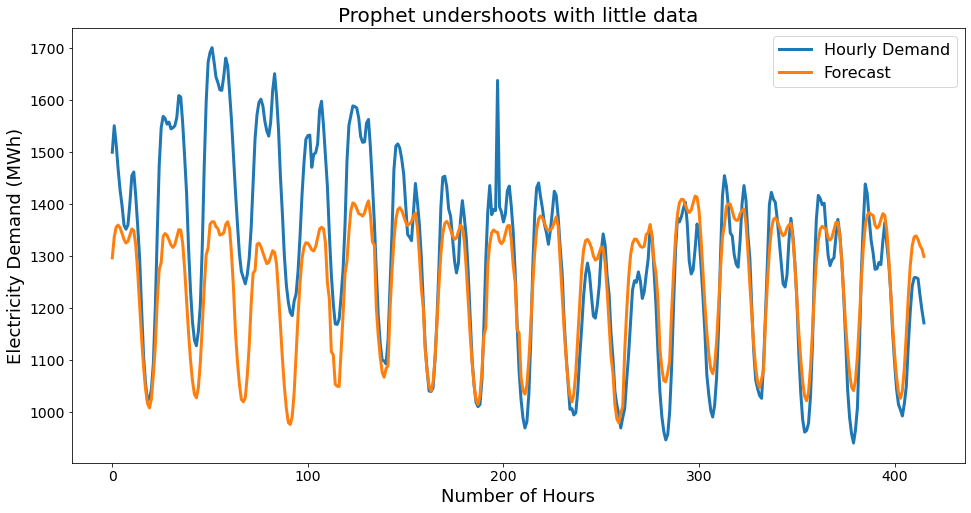

In [160]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true,linewidth=3, label='Hourly Demand')
plt.plot(y_pred, linewidth=3, label='Forecast')
plt.xlabel('Number of Hours', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.title('Prophet undershoots with little data', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

In [161]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

127.17128268054682

### calculate eia rmse using a lot more data

In [45]:
df = pickle.load( open( "new_electricity_data.pkl", "rb" ) )

In [46]:
df.shape

(50011, 1)

In [47]:
forecast = pd.read_csv('Day-ahead_demand_forecast_for_Seattle_City_Light_(SCL)_hourly_-_UTC_time.csv', header=4)

In [48]:
forecast.shape

(49781, 2)

In [49]:
df.dropna(axis=0, inplace=True)

In [50]:
df.shape

(50011, 1)

In [51]:
forecast.dropna(axis=0, inplace=True)

In [52]:
forecast.shape

(49781, 2)

In [53]:
forecast.isna().sum()

Category                                     0
Series ID: EBA.SCL-ALL.DF.H megawatthours    0
dtype: int64

In [54]:
forecast['DATE']= pd.to_datetime(forecast['Category'])

In [55]:
forecast = forecast[['DATE','Series ID: EBA.SCL-ALL.DF.H megawatthours']]

In [56]:
forecast.head()

,DATE,Series ID: EBA.SCL-ALL.DF.H megawatthours
0,2021-03-21 07:00:00,962
1,2021-03-21 06:00:00,1022
2,2021-03-21 05:00:00,1075
3,2021-03-21 04:00:00,1111
4,2021-03-21 03:00:00,1106


In [57]:
forecast.rename(columns={'Series ID: EBA.SCL-ALL.DF.H megawatthours':'FORECAST'}, inplace=True)

In [58]:
forecast = forecast[::-1]

In [59]:
forecast.reset_index(inplace=True, drop=True)

In [60]:
forecast.head()

,DATE,FORECAST
0,2015-07-01 08:00:00,865
1,2015-07-01 09:00:00,841
2,2015-07-01 10:00:00,790
3,2015-07-01 11:00:00,783
4,2015-07-01 12:00:00,800


In [61]:

df.head()

,DEMAND
DATE,
2015-07-01 08:00:00+00:00,873.0
2015-07-01 09:00:00+00:00,833.0
2015-07-01 10:00:00+00:00,802.0
2015-07-01 11:00:00+00:00,796.0
2015-07-01 12:00:00+00:00,807.0


In [62]:
df.reset_index(inplace=True)

In [63]:
df.DATE.iloc[0] == forecast.DATE.iloc[0]

False

In [64]:
str(df.DATE.iloc[0])[:13]

'2015-07-01 08'

In [65]:
df.DATE = df.DATE.apply(lambda x: str(x)[:13])

In [66]:
forecast.DATE = forecast.DATE.apply(lambda x: str(x)[:13])

In [67]:
forecast

,DATE,FORECAST
0,2015-07-01 08,865
1,2015-07-01 09,841
2,2015-07-01 10,790
3,2015-07-01 11,783
4,2015-07-01 12,800
...,...,...
49776,2021-03-21 03,1106
49777,2021-03-21 04,1111
49778,2021-03-21 05,1075
49779,2021-03-21 06,1022


In [68]:
d = df.set_index('DATE').join(forecast.set_index('DATE'))

In [69]:
d

,DEMAND,FORECAST
DATE,,
2015-07-01 08,873.0,865.0
2015-07-01 09,833.0,841.0
2015-07-01 10,802.0,790.0
2015-07-01 11,796.0,783.0
2015-07-01 12,807.0,800.0
...,...,...
2021-03-18 10,855.0,845.0
2021-03-18 11,859.0,851.0
2021-03-18 12,892.0,890.0


In [70]:
d = d.loc[(~d.DEMAND.isna()) & (~d.FORECAST.isna())]

In [71]:
d.shape

(49687, 2)

In [72]:
mse = mean_squared_error(d.DEMAND, d.FORECAST)
rmse = np.sqrt(mse)
rmse

98.72214252394181

## Bar plot of RMSE as percent error

In [163]:
average = y_to_test.mean()
x = ['SARIMAX', 'TBATS', 'Prophet', 'EIA']
y = [130.61, 89.56, 87.63, 98.72]/average*100

Text(0.5, 1.0, 'Prophet performed best with lowest error')

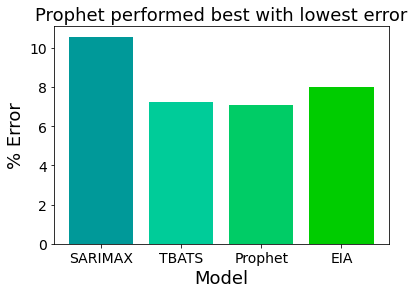

In [164]:
plt.bar(np.arange(0,4,1),y, color=['#009999', '#00cc99', '#00cc66', '#00cc00'])
plt.xticks(np.arange(0,4,1),x, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Model', fontsize=18)
plt.ylabel('% Error', fontsize=18)
plt.title('Prophet performed best with lowest error', fontsize=18)